In [12]:
# import tensorflow 

import tensorflow as tf
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore') 
import datetime, os
import numpy as np

In [2]:
# check version of tensorflow 

tf.__version__ 

'2.0.0'

The first phase is data ingestion and transformation.
 Here, we take mnist dataset from tensorflow and then split it into training set and test set.
 Training set trains the model and test-set will test how accurate the model is.
 We divide them by 255 because the value of data ranges from 0 to 255.
 Now by dividing it, the range is between 0 to 1.

In [9]:
# load the dataset

mnist = tf.keras.datasets.mnist

# split into train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#set class names 
class_names = ["0","1","2","3","4","5","6","7","8","9"]

#normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

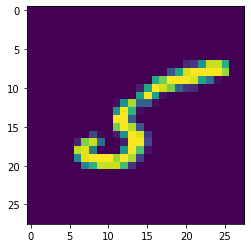

In [5]:
plt.imshow(x_train[11])
plt.show() 

The code written below describes the model building phase.
 Here we use a sequential layer in the model which means a sequence of the layer.
 Flatten reduces the dimension of the model and dense adds layer of the neuron.
 Each layer needs an activation function which is relu and softmax.

In [6]:
# create teh model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')])

Then compile the model with an optimizer and a loss function.
 Then, we train the data so that our dataset gives accurate results

In [7]:
#compile the model with optimizer and loss function
model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])



In [8]:
#train the model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=7)

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 13s 214us/sample - loss: 0.3087 - accuracy: 0.9073 - val_loss: 0.1232 - val_accuracy: 0.9624
Epoch 2/7
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1480 - accuracy: 0.9543 - val_loss: 0.0993 - val_accuracy: 0.9697
Epoch 3/7
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1164 - accuracy: 0.9640 - val_loss: 0.0853 - val_accuracy: 0.9742
Epoch 4/7
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0981 - accuracy: 0.9690 - val_loss: 0.0795 - val_accuracy: 0.9744
Epoch 5/7
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0842 - accuracy: 0.9734 - val_loss: 0.0824 - val_accuracy: 0.9744
Epoch 6/7
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0767 - accuracy: 0.9754 - val_loss: 0.0773 - val_accuracy: 0.9765
Epoch 7/7
60000/60000 [==============================] 

Some customization during Training the model 

In [17]:
model.fit(x_train,y_train, epochs=5, 
          callbacks=[tf.keras.callbacks.EarlyStopping(),
                     tf.keras.callbacks.TensorBoard(), 
                     tf.keras.callbacks.ModelCheckpoint('.')])

Train on 60000 samples
Epoch 1/5
59744/60000 [============================>.] - ETA: 0s - loss: 0.0889 - accuracy: 0.9722WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: .\assets
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0889 - accuracy: 0.9722
Epoch 2/5
59712/60000 [============================>.] - ETA: 0s - loss: 0.0764 - accuracy: 0.9758WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
INFO:tensorflow:Assets written to: .\assets
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0764 - accuracy: 0.9758
Epoch 3/5
59712/60000 [============================>.] - ETA: 0s - loss: 0.0667 - accuracy: 0.9785WARNING:tensorflow:Early stopping conditioned on metric `val_los

Here, the callbacks are used in model.fit() method. Here, the class Earlystopping() is used so that the model stops training when the improvement in model is stopped. TensorBoard() class is used for providing a visualization of how the model is getting trained. ModelCheckpoint() is used to save the model after every epoch. Here the model will be saved 10 times.

This function gives us how much accurate is our model on the test set.

In [43]:
#test the model with the test set 
model.evaluate(x_test,  y_test, verbose=3)

[0.09129859392177314, 0.9728]

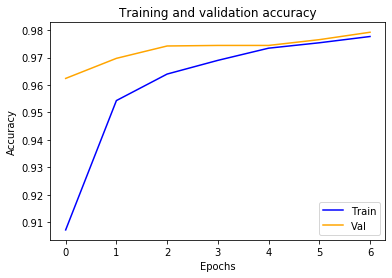

In [10]:
#get stats from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

# plot accuracy vs epochs 
plt.title('Training and validation accuracy')
plt.plot(epochs,acc, color='blue',label="Train")
plt.plot(epochs,val_acc, color='orange', label="Val")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
#save the model 
model.save("mnist.h5")

In [18]:
# perform prediction 

predictions = model.predict(x_test)
print(class_names[np.argmax(predictions[90])])

3
